In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
housing_data = pd.read_csv("housing.csv")

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna((housing_data['total_bedrooms'].sum())/len(housing_data['total_bedrooms']))


housing_data = housing_data[housing_data['median_house_value'] < (housing_data['median_house_value'].max())]


In [6]:
housing_cat = housing_data['ocean_proximity']
housing_cat_encoded,housing_categories = housing_cat.factorize()
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot = housing_cat_1hot.toarray()
ocean_proximity_cat_1hot = pd.DataFrame(housing_cat_1hot)
ocean_proximity_cat_1hot = ocean_proximity_cat_1hot.rename(columns=
                            {0: 'NEAR BAY', 1: '<1H OCEAN', 2:'INLAND', 3:'NEAR OCEAN', 4:'ISLAND'})
housing_data = housing_data.reset_index(drop=True)
housing_data = pd.concat([housing_data, ocean_proximity_cat_1hot], axis=1, sort=False)
housing_data = housing_data.drop('ocean_proximity',axis=1)


In [7]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.0,0.0,0.0,0.0,0.0


In [8]:
class Tree :
    def __init__ (self,X_train,y_train,X_test,y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
    def fit_tree (self,depth):
        dTree = DecisionTreeRegressor(max_depth=depth)
        return dTree.fit(self.X_train,self.y_train)
    
    def predict_tree (self,depth):
        pred = self.fit_tree(depth).predict(self.X_train,self.y_train)
        return pred
    
    def evaluate_tree (self,depth):
        mse = mean_squared_error(self.y_test,self.predict_tree(depth))
        rmse = np.sqrt(mse)
        return rmse
        
        
    #dTree.fit(self.X_train,self.y_train) 
        

In [9]:
housing_train, housing_test = train_test_split(housing_data, test_size=0.33, random_state=11)


In [10]:
lat_income_train = Tree(housing_train[['latitude','median_income']],
                        housing_train[['median_house_value']],
                        housing_train[['latitude','median_income']],
                        housing_train[['median_house_value']])

lat_income_test =  Tree(housing_train[['latitude','median_income']],
                        housing_train[['median_house_value']],
                        housing_test[['latitude','median_income']],
                        housing_test[['median_house_value']])

loc_income_train = Tree(housing_train[['latitude','longitude','median_income']],
                        housing_train[['median_house_value']],
                        housing_train[['latitude','longitude','median_income']],
                        housing_train[['median_house_value']])

loc_income_test =  Tree(housing_train[['latitude','longitude','median_income']],
                        housing_train[['median_house_value']],
                        housing_test[['latitude','longitude','median_income']],
                        housing_test[['median_house_value']])


all_train = Tree(housing_train.drop('median_house_value',axis=1),
                        housing_train[['median_house_value']],
                        housing_train.drop('median_house_value',axis=1),
                        housing_train[['median_house_value']])

all_test =  Tree(housing_train.drop('median_house_value',axis=1),
                        housing_train[['median_house_value']],
                        housing_test.drop('median_house_value',axis=1),
                        housing_test[['median_house_value']])




## To implement in PyCharm: 
Functions are done

In [11]:
def plot_errors (max_depth,X_train,y_train,X_test,y_test):
    train_results = []
    test_results = []
    df = pd.DataFrame()
    for i in range (1,max_depth):
    
    # What is the initialize, fit & predict function like? Can I reference it here?  
    # I need to be able to iterate over a range of depths
        clf = DecisionTreeRegressor(max_depth=i)
        pred_train = clf.fit(X_train,y_train.values.ravel()).predict(X_train)
        pred_test = clf.fit(X_train,y_train.values.ravel()).predict(X_test)
    
    # I need predictions on a train and test/validate test
        rmse_train,rmse_test = np.sqrt(mean_squared_error(y_train,pred_train)),np.sqrt(mean_squared_error(y_test,pred_test))
        train_results.append(rmse_train)
        test_results.append(rmse_test)
    df['Train'],df['Test'] = (train_results), (test_results)
    #return df.plot();
    return df   

    
def plot_forest_errors (max_depth,X_train,y_train,X_test,y_test):
    train_results = []
    test_results = []
    df = pd.DataFrame()
    for i in range (1,max_depth):
    
    # What is the initialize, fit & predict function like? Can I reference it here?  
    # I need to be able to iterate over a range of depths
        rfr = RandomForestRegressor(max_depth=i)
        pred_train = rfr.fit(X_train,y_train.values.ravel()).predict(X_train)
        pred_test = rfr.fit(X_train,y_train.values.ravel()).predict(X_test)
    
    # I need predictions on a train and test/validate test
        rmse_train,rmse_test = np.sqrt(mean_squared_error(y_train,pred_train)),np.sqrt(mean_squared_error(y_test,pred_test))
        train_results.append(rmse_train)
        test_results.append(rmse_test)
    df['Train'],df['Test'] = (train_results), (test_results)
    #return df.plot();
    return df



In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


def print_errors(test, predicted):
    print("MSE: ", mean_squared_error(test, predicted))
    print("RMSE: ", np.sqrt(mean_squared_error(test, predicted)))
    print("R2: ", r2_score(test, predicted))
    print("RMSE % of mean:", (np.sqrt(mean_squared_error(test, predicted))) / (test.values.mean()))
    print("Calibration:", predicted.mean() / test.values.mean())


## Still needs to be implemented: 

In [22]:
X = housing_train[['latitude','longitude']]
y = housing_train[['median_house_value']]
X_t = housing_test[['latitude','longitude']]
y_t = housing_test[['median_house_value']]



In [27]:
# Test for multiple plots

a = plot_errors(2000,X,y,X_t,y_t)
b = plot_forest_errors(2000,X,y,X_t,y_t)
c = pd.concat([a,b],axis=1)

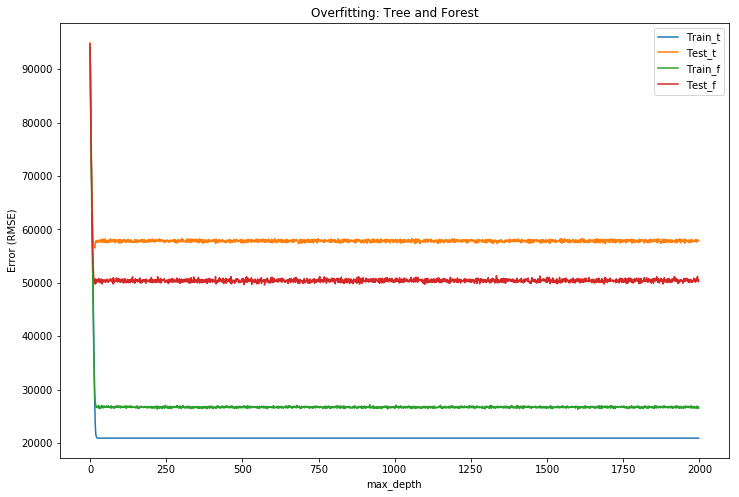

In [28]:
c.columns = ['Train_t','Test_t','Train_f','Test_f']
ax=c.plot(figsize=(12,8),title='Overfitting: Tree and Forest')
ax.set(xlabel="max_depth", ylabel="Error (RMSE)");


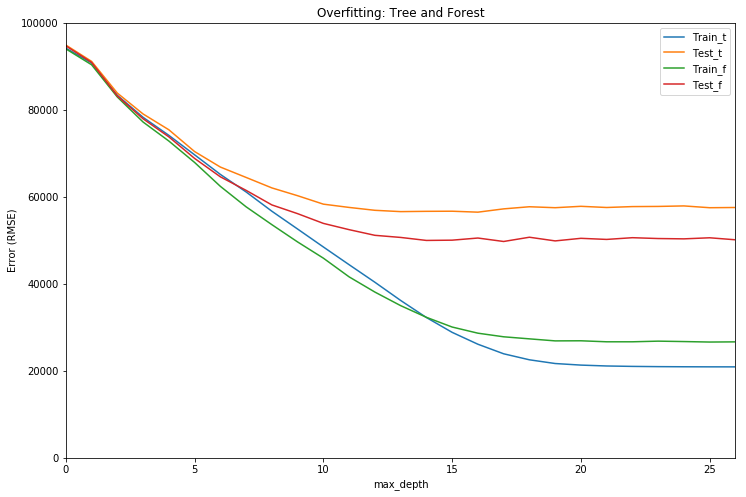

In [29]:
c.columns = ['Train_t','Test_t','Train_f','Test_f']
ax = c.plot(figsize=(12,8),xlim=(0,26),ylim=(2,100000),title='Overfitting: Tree and Forest')
ax.set(xlabel="max_depth", ylabel="Error (RMSE)");



In [17]:
plot_errors(20,X,y,X_t,y_t)


clf = DecisionTreeRegressor(max_depth=6)
pred_train,pred_test = clf.fit(X,y).predict(X),clf.fit(X,y).predict(X_t)


print_errors(y, pred_train)
print('')
print_errors(y_t, pred_test)

MSE:  4857280662.107652
RMSE:  69694.19389093794
R2:  0.48819329169660974
RMSE % of mean: 0.3623392134052071
Calibration: 1.0

MSE:  4962242352.823213
RMSE:  70443.18528305781
R2:  0.48640831185013056
RMSE % of mean: 0.3654688291887062
Calibration: 0.9949102742325008


In [18]:
plot_forest_errors(20,X,y,X_t,y_t)

woods = RandomForestRegressor() 
pred_train,pred_test = woods.fit(X,y.values.ravel()).predict(X),woods.fit(X,y.values.ravel()).predict(X_t)


print_errors(y, pred_train)
print('')
print_errors(y_t, pred_test)


MSE:  707189113.0288154
RMSE:  26593.027526568225
R2:  0.9254842045857364
RMSE % of mean: 0.13825680645820113
Calibration: 0.9968277636634846

MSE:  2574239543.5529747
RMSE:  50736.96427214556
R2:  0.7335664123451522
RMSE % of mean: 0.2632302735122052
Calibration: 0.9948588619350524


## Tests for PyCharm

In [ ]:
import unittest

class TestErrorCalculation(unittest.TestCase):

    def test_upper(self):
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        self.assertTrue('FOO'.isupper())
        self.assertFalse('Foo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # check that s.split fails when the separator is not a string
        with self.assertRaises(TypeError):
            s.split(2)



## End of PyCharm Project

In [ ]:
# Cross validation score
print("Latitude, Income: ")
print(cross_val_score(lat_income_train.fit_tree(4),lat_income_train.X_train ,
                      lat_income_train.y_train,cv=5 ))
print("")
print("Latitude, Longitude, Income: ")
print(cross_val_score(loc_income_train.fit_tree(5),loc_income_train.X_train ,
                      loc_income_train.y_train,cv=5 ))
print("")
print("All features: ")
print(cross_val_score(all_train.fit_tree(5),all_train.X_train ,
                      all_train.y_train,cv=5 ))

## Decision Tree: Pruning

In [ ]:
import sys

from sklearn.tree import _tree


def prune(inner_tree, index):
    """
    The given tree object is modified to resemble a version pruned at index
    @:param inner_tree: sk-learn tree object
    @:param index: the index of the node at which inner_tree is pruned
    """

    # wenn es 'children' gibt besuche ich die 'children'
    if inner_tree.children_left[index] != _tree.TREE_LEAF:
        prune(inner_tree, inner_tree.children_left[index])

        prune(inner_tree, inner_tree.children_right[index])

        # set node to leaf
        idx_left = inner_tree.children_left[index]
        idx_right = inner_tree.children_right[index]

        inner_tree.children_left[index] = _tree.TREE_LEAF
        inner_tree.children_right[index] = _tree.TREE_LEAF

        inner_tree.n_node_samples[idx_left] = 0
        inner_tree.n_node_samples[idx_right] = 0

        inner_tree.impurity[idx_left] = 0
        inner_tree.impurity[idx_right] = 0


    else:
        # wenn es keine 'children' gibt kann ich prunen
        inner_tree.n_node_samples[index] = 0


def determine_alpha(tree):
    """
    Given a regression tree, the relevant penalty scalars gk are determined for pruning. Every
    inner node of the tree is visit to evaluate the penalty scalar gk that would make pruning in each node reasonable.
    The minimum gk is returned
    @:param tree: sk-learn tree object
    @:returns the index and corresponding values of the minimal gk found in the tree (alpha)
    """
    min_gk = sys.maxsize
    min_node_idx = tree.node_count

    # traverse all inner nodes in to find min_gk
    for node_idx in range(tree.node_count):
        # if node is a leaf node, skip node
        if tree.children_left[node_idx] == _tree.TREE_LEAF:
            continue

        # inner node
        node_impurity = tree.n_node_samples[node_idx] * tree.impurity[node_idx]
        subtree_impurity, subtree_leafs = _calc_impurity(tree, node_idx)
        
        idx_list, ni_list, sti_list, stl_list = [],[],[],[]
        idx_list.append(node_idx)
        ni_list.append(node_impurity)
        sti_list.append(subtree_impurity)
        stl_list.append(subtree_leafs)
        df = pd.DataFrame()
        df['Node idx']=(idx_list)
        df['Node impurity']=(ni_list)
        df['Subtree impurity']=(sti_list)
        df['Subtree leafs']=(stl_list)
        
        

        #print('IDX: ', node_idx, 'NI: ', node_impurity, 'STI: ', subtree_impurity, 'STL: ', subtree_leafs)

        gk = (node_impurity - subtree_impurity) / (subtree_leafs - 1.)

        if gk < min_gk:
            min_node_idx = node_idx
            min_gk = gk
       
    return min_node_idx, min_gk


def _calc_impurity(tree, index):
    """
    Calc_impurity is a recursive function for calculating the absolute impurity of any subtree.
    The absolute impurity is calculated by the impurity of every leaf-node scaled with the number of samples per node.
    @:param tree: sk-learn tree object
    @:param index: the index of the root node of the subtree
    @:returns impurity and leaf count of subtree
    """

    # print("index: ", index, " impurity: ", d_tree.tree_.n_node_samples[index] * tree.impurity[index] / 10000000)
    # wenn es 'children' besuche die 'children'
    if tree.children_left[index] != _tree.TREE_LEAF:
        impurity_left, leafs_left = _calc_impurity(tree, tree.children_left[index])
        impurity_right, leafs_right = _calc_impurity(tree, tree.children_right[index])

        return impurity_left + impurity_right, leafs_left + leafs_right

    # wenn es keine 'children' gibt bin ich ein leaf Knoten
    else:
        # print("index: ", index, " cost: ", d_tree.tree_.n_node_samples[index] * tree.impurity[index]/10000000)
        return tree.n_node_samples[index] * tree.impurity[index], 1





In [ ]:
import time


def fit(model, features, targets):
    start = time.time()
    model.fit(features, targets)
    end = time.time()
    print ('Time train: ' + str(round((end-start),4)))
    return model


def predict_w_proba(model, data):
    start = time.time()
    pred = model.predict(data)
    pred_proba = model.predict_proba(data)
    end = time.time()
    print ('Time test: ' + str(round((end-start),4)))
    return pred, pred_proba

def predict(model, data):
    start = time.time()
    pred = model.predict(data)
    end = time.time()
    print ('Time test: ' + str(round((end-start),4)))
    return pred


In [ ]:
result= fit(DecisionTreeRegressor(max_depth=5),housing_train[['latitude', 'longitude']], housing_train['median_house_value'])

predict(result,housing_test[['latitude', 'longitude']])



In [ ]:
import copy

import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor


sns.set()


input_features = housing_train[['latitude', 'longitude']]
target = housing_train['median_house_value'] / 100000

d_tree = DecisionTreeRegressor(max_depth=5)
d_tree.fit(input_features, target)

tree_array = [d_tree]

num_nodes = d_tree.tree_.capacity
index = 0
alpha = 0
k = 1

while num_nodes > 1:
    tree_array.append(copy.deepcopy(tree_array[k - 1]))
    min_node_idx, min_gk = determine_alpha(tree_array[k].tree_)
    prune(tree_array[k].tree_, min_node_idx)
    num_nodes = sum(1 * (tree_array[k].tree_.n_node_samples != 0))

    k += 1
   

p_tree = tree_array[k-1]
pred = p_tree.predict(housing_test[['latitude','longitude']])
mse = mean_squared_error(y_pred=pred,y_true=housing_test['median_house_value']/ 100000 )

print (mse)
print_errors(predicted=pred,test=housing_test['median_house_value']/ 100000 )
print(len(tree_array))

#p_tree.tree_.impurity

    #if False:
        #for k in range(0,len(tree_array)):
            #export_graphviz(tree_array[k], out_file='tree' + str(k) + '.dot')
        